# Install some required packages

In [1]:
#!conda install -y python-graphviz
#!pip install pydotplus

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         151 KB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    graphviz-2.42.3            |       h0511662_0         6.9 MB  conda-forge
    libtool-2.4.6              |    h14c3975_1002         512 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python-graphviz-0.14       |     pyh9f0ad1d_0          19 KB  conda-forge
    xorg-

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')
sns.set()

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# 1. Read your Titanic dataset as usual: Training set and Testing set Apply decision tree.

In [3]:
data=pd.read_csv('train_titanic.csv')
pd.set_option('display.max_columns', 1000)
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data preprocessing

In [5]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data['Cabin'] = data['Cabin'].fillna("U0")
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(int)
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Deck  
0        0         A/5 21171   7.2500    U0        S     8  
1        0          PC 17599  71.2833   C85        C     3  
2        0  STON/O2. 3101282   7.9250    U0        S     8  
3        0            113803  53.1000  C123        S     3  
4        0            373450   8.0500    U0        S     8  
..     ...               ...      ...   ...      ...   ...  
886      0            211536  13.0000    U0        S     8  
887      0            112053  30.0000   B42        S     2  
888      2        W./C. 6607  23.4500    U0        S     8  
889      0            111369  30.0000  C148        C     3  
890      0            370376   7.7500    U0        Q     8  

[891 rows x 13 columns]

In [6]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ...   
886                              Montvila, Rev. Juozas    male   27      0   
887                       Graham, Miss. Margaret Edith  female   19      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   28      1   
889                              Behr, Mr. Karl Howell    male   26      0   
890                                Dooley, Mr. Patrick    male   32      0   

     Parch            Ticket     Fare Cabin Embarked  Deck  
0        0         A/5 21171   7.2500    U0        S     8  
1        0          PC 17599  71.2833   C85        C     3  
2        0  STON/O2. 3101282   7.9250    U0        S     8  
3        0            113803  53.1000  C123        S     3  
4        0            373450   8.0500    U0        S     8  
..     ...               ...      ...   ...      ...   ...  
886      0            211536  13.0000    U0        S     8  
887      0            112053  30.0000   B42        S     2  
888      2        W./C. 6607  23.4500    U0        S     8  
889      0            111369  30.0000  C148        C     3  
890      0            370376   7.7500    U0        Q     8  

[891 rows x 13 columns]

In [7]:
sex_dict={"Sex":{"female":0,"male":1}}
data=data.replace(sex_dict)
data['Title']=data.apply(lambda row: row["Name"].split('.')[0].split(',')[1].strip(), axis=1)
data["Embarked"]=data["Embarked"].fillna(value="S")
data=data.drop(["PassengerId","Cabin"],axis=1)
data.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

   Age  SibSp  Parch            Ticket     Fare Embarked  Deck Title  
0   22      1      0         A/5 21171   7.2500        S     8    Mr  
1   38      1      0          PC 17599  71.2833        C     3   Mrs  
2   26      0      0  STON/O2. 3101282   7.9250        S     8  Miss  
3   35      1      0            113803  53.1000        S     3   Mrs  
4   35      0      0            373450   8.0500        S     8    Mr

In [8]:
data[["Title","Survived"]].groupby("Title").count().sort_values(by="Survived")

Survived
Title                 
Capt                 1
Ms                   1
Mme                  1
Sir                  1
Lady                 1
the Countess         1
Don                  1
Jonkheer             1
Major                2
Mlle                 2
Col                  2
Rev                  6
Dr                   7
Master              40
Mrs                125
Miss               182
Mr                 517

In [9]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'the Countess' ], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data[["Title","Survived"]].groupby("Title").count().sort_values(by="Survived")

Survived
Title           
Rare          23
Master        40
Mrs          126
Miss         185
Mr           517

In [10]:
data

Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2           1       3                             Heikkinen, Miss. Laina    0   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

     Age  SibSp  Parch            Ticket     Fare Embarked  Deck Title  
0     22      1      0         A/5 21171   7.2500        S     8    Mr  
1     38      1      0          PC 17599  71.2833        C     3   Mrs  
2     26      0      0  STON/O2. 3101282   7.9250        S     8  Miss  
3     35      1      0            113803  53.1000        S     3   Mrs  
4     35      0      0            373450   8.0500        S     8    Mr  
..   ...    ...    ...               ...      ...      ...   ...   ...  
886   27      0      0            211536  13.0000        S     8  Rare  
887   19      0      0            112053  30.0000        S     2  Miss  
888   28      1      2        W./C. 6607  23.4500        S     8  Miss  
889   26      0      0            111369  30.0000        C     3    Mr  
890   32      0      0            370376   7.7500        Q     8    Mr  

[891 rows x 12 columns]

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

In [12]:
d=data[["Ticket"]].groupby(data.Ticket).count()>1
group_ticket=d[d["Ticket"]==True].index.to_list()
data[data["Ticket"].isin(group_ticket)]

Survived  Pclass                                               Name  Sex  \
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
7           0       3                     Palsson, Master. Gosta Leonard    1   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)    0   
10          1       3                    Sandstrom, Miss. Marguerite Rut    0   
..        ...     ...                                                ...  ...   
876         0       3                      Gustafsson, Mr. Alfred Ossian    1   
879         1       1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)    0   
880         1       2       Shelley, Mrs. William (Imanita Parrish Hall)    0   
885         0       3               Rice, Mrs. William (Margaret Norton)    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   

     Age  SibSp  Parch      Ticket     Fare Embarked  Deck   Title  
3     35      1      0      113803  53.1000        S     3     Mrs  
7      2      3      1      349909  21.0750        S     8  Master  
8     27      0      2      347742  11.1333        S     8     Mrs  
9     14      1      0      237736  30.0708        C     8     Mrs  
10     4      1      1     PP 9549  16.7000        S     7    Miss  
..   ...    ...    ...         ...      ...      ...   ...     ...  
876   20      0      0        7534   9.8458        S     8      Mr  
879   56      0      1       11767  83.1583        C     3     Mrs  
880   25      0      1      230433  26.0000        S     8     Mrs  
885   39      0      5      382652  29.1250        Q     8     Mrs  
888   28      1      2  W./C. 6607  23.4500        S     8    Miss  

[344 rows x 12 columns]

In [13]:
grps_idx=data[data["Ticket"].isin(group_ticket)].index
data["is_grouped"]=0
data["is_grouped"].iloc[grps_idx]=1
data

Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2           1       3                             Heikkinen, Miss. Laina    0   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    0   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    0   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

     Age  SibSp  Parch            Ticket     Fare Embarked  Deck Title  \
0     22      1      0         A/5 21171   7.2500        S     8    Mr   
1     38      1      0          PC 17599  71.2833        C     3   Mrs   
2     26      0      0  STON/O2. 3101282   7.9250        S     8  Miss   
3     35      1      0            113803  53.1000        S     3   Mrs   
4     35      0      0            373450   8.0500        S     8    Mr   
..   ...    ...    ...               ...      ...      ...   ...   ...   
886   27      0      0            211536  13.0000        S     8  Rare   
887   19      0      0            112053  30.0000        S     2  Miss   
888   28      1      2        W./C. 6607  23.4500        S     8  Miss   
889   26      0      0            111369  30.0000        C     3    Mr   
890   32      0      0            370376   7.7500        Q     8    Mr   

     is_grouped  
0             0  
1             0  
2             0  
3             1  
4             0  
..          ...  
886           0  
887           0  
888           1  
889           0  
890           0  

[891 rows x 13 columns]

In [14]:
data["ones"]=1
dict_tkts=data[data["Ticket"].isin(group_ticket)][["Ticket","ones"]].groupby("Ticket").sum().to_dict()["ones"]
print(dict_tkts)

{'110152': 3, '110413': 3, '110465': 2, '111361': 2, '113505': 2, '113572': 2, '113760': 4, '113776': 2, '113781': 4, '113789': 2, '113798': 2, '113803': 2, '113806': 2, '11668': 2, '11751': 2, '11767': 2, '11967': 2, '12749': 2, '13502': 3, '13507': 2, '1601': 7, '16966': 2, '17421': 4, '17453': 2, '17474': 2, '19877': 2, '19928': 2, '19943': 2, '19950': 4, '19996': 2, '220845': 2, '230080': 3, '230136': 2, '230433': 2, '231919': 2, '237736': 2, '239853': 3, '239865': 2, '24160': 3, '243847': 2, '244252': 2, '244367': 2, '248727': 3, '248738': 2, '250644': 2, '250647': 2, '250649': 2, '250655': 2, '2627': 2, '26360': 2, '2651': 2, '2653': 2, '2659': 2, '2661': 2, '2665': 2, '2666': 4, '2668': 2, '2678': 2, '2691': 2, '2699': 2, '28403': 2, '2908': 2, '29106': 3, '29750': 2, '3101278': 2, '3101295': 6, '31027': 2, '345764': 2, '345773': 3, '347054': 2, '347077': 4, '347080': 2, '347082': 7, '347088': 6, '347742': 3, '349237': 2, '349909': 4, '35273': 3, '35281': 2, '358585': 2, '363291

In [15]:
data["group_size"]=data["Ticket"].map(dict_tkts).fillna(1).astype('int')
data.drop(["Name","Ticket","ones"],axis=1,inplace=True)
data

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Deck Title  \
0           0       3    1   22      1      0   7.2500        S     8    Mr   
1           1       1    0   38      1      0  71.2833        C     3   Mrs   
2           1       3    0   26      0      0   7.9250        S     8  Miss   
3           1       1    0   35      1      0  53.1000        S     3   Mrs   
4           0       3    1   35      0      0   8.0500        S     8    Mr   
..        ...     ...  ...  ...    ...    ...      ...      ...   ...   ...   
886         0       2    1   27      0      0  13.0000        S     8  Rare   
887         1       1    0   19      0      0  30.0000        S     2  Miss   
888         0       3    0   28      1      2  23.4500        S     8  Miss   
889         1       1    1   26      0      0  30.0000        C     3    Mr   
890         0       3    1   32      0      0   7.7500        Q     8    Mr   

     is_grouped  group_size  
0             0           1  
1             0           1  
2             0           1  
3             1           2  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           1           2  
889           0           1  
890           0           1  

[891 rows x 12 columns]

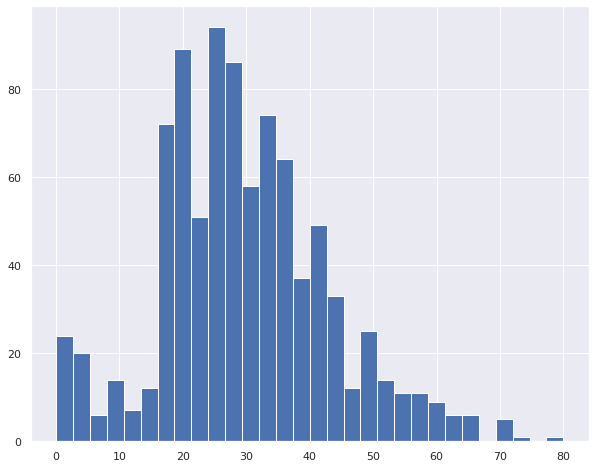

In [16]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
data['Age'].hist(bins=30)

In [17]:
def generation(age):
    if age < 1:
        return 'Baby'
    elif age < 3:
        return 'Toddler'
    elif age < 15:
        return 'Child'
    elif age < 18:
        return 'Teenager'
    elif age < 21:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Retired'
data['Generation']=data['Age'].apply(generation)
data

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Deck Title  \
0           0       3    1   22      1      0   7.2500        S     8    Mr   
1           1       1    0   38      1      0  71.2833        C     3   Mrs   
2           1       3    0   26      0      0   7.9250        S     8  Miss   
3           1       1    0   35      1      0  53.1000        S     3   Mrs   
4           0       3    1   35      0      0   8.0500        S     8    Mr   
..        ...     ...  ...  ...    ...    ...      ...      ...   ...   ...   
886         0       2    1   27      0      0  13.0000        S     8  Rare   
887         1       1    0   19      0      0  30.0000        S     2  Miss   
888         0       3    0   28      1      2  23.4500        S     8  Miss   
889         1       1    1   26      0      0  30.0000        C     3    Mr   
890         0       3    1   32      0      0   7.7500        Q     8    Mr   

     is_grouped  group_size   Generation  
0             0           1        Adult  
1             0           1        Adult  
2             0           1        Adult  
3             1           2        Adult  
4             0           1        Adult  
..          ...         ...          ...  
886           0           1        Adult  
887           0           1  Young Adult  
888           1           2        Adult  
889           0           1        Adult  
890           0           1        Adult  

[891 rows x 13 columns]

In [18]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Embarked']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data=data.drop(["Embarked"],axis=1).join(d)
data

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Deck Title  \
0           0       3    1   22      1      0   7.2500     8    Mr   
1           1       1    0   38      1      0  71.2833     3   Mrs   
2           1       3    0   26      0      0   7.9250     8  Miss   
3           1       1    0   35      1      0  53.1000     3   Mrs   
4           0       3    1   35      0      0   8.0500     8    Mr   
..        ...     ...  ...  ...    ...    ...      ...   ...   ...   
886         0       2    1   27      0      0  13.0000     8  Rare   
887         1       1    0   19      0      0  30.0000     2  Miss   
888         0       3    0   28      1      2  23.4500     8  Miss   
889         1       1    1   26      0      0  30.0000     3    Mr   
890         0       3    1   32      0      0   7.7500     8    Mr   

     is_grouped  group_size   Generation  f_Q  f_S  
0             0           1        Adult  0.0  1.0  
1             0           1        Adult  0.0  0.0  
2             0           1        Adult  0.0  1.0  
3             1           2        Adult  0.0  1.0  
4             0           1        Adult  0.0  1.0  
..          ...         ...          ...  ...  ...  
886           0           1        Adult  0.0  1.0  
887           0           1  Young Adult  0.0  1.0  
888           1           2        Adult  0.0  1.0  
889           0           1        Adult  0.0  0.0  
890           0           1        Adult  1.0  0.0  

[891 rows x 14 columns]

In [19]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Generation']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data=data.drop(["Generation"],axis=1).join(d)
data

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Deck Title  \
0           0       3    1   22      1      0   7.2500     8    Mr   
1           1       1    0   38      1      0  71.2833     3   Mrs   
2           1       3    0   26      0      0   7.9250     8  Miss   
3           1       1    0   35      1      0  53.1000     3   Mrs   
4           0       3    1   35      0      0   8.0500     8    Mr   
..        ...     ...  ...  ...    ...    ...      ...   ...   ...   
886         0       2    1   27      0      0  13.0000     8  Rare   
887         1       1    0   19      0      0  30.0000     2  Miss   
888         0       3    0   28      1      2  23.4500     8  Miss   
889         1       1    1   26      0      0  30.0000     3    Mr   
890         0       3    1   32      0      0   7.7500     8    Mr   

     is_grouped  group_size  f_Q  f_S  f_Baby  f_Child  f_Middle-aged  \
0             0           1  0.0  1.0     0.0      0.0            0.0   
1             0           1  0.0  0.0     0.0      0.0            0.0   
2             0           1  0.0  1.0     0.0      0.0            0.0   
3             1           2  0.0  1.0     0.0      0.0            0.0   
4             0           1  0.0  1.0     0.0      0.0            0.0   
..          ...         ...  ...  ...     ...      ...            ...   
886           0           1  0.0  1.0     0.0      0.0            0.0   
887           0           1  0.0  1.0     0.0      0.0            0.0   
888           1           2  0.0  1.0     0.0      0.0            0.0   
889           0           1  0.0  0.0     0.0      0.0            0.0   
890           0           1  1.0  0.0     0.0      0.0            0.0   

     f_Retired  f_Teenager  f_Toddler  f_Young Adult  
0          0.0         0.0        0.0            0.0  
1          0.0         0.0        0.0            0.0  
2          0.0         0.0        0.0            0.0  
3          0.0         0.0        0.0            0.0  
4          0.0         0.0        0.0            0.0  
..         ...         ...        ...            ...  
886        0.0         0.0        0.0            0.0  
887        0.0         0.0        0.0            1.0  
888        0.0         0.0        0.0            0.0  
889        0.0         0.0        0.0            0.0  
890        0.0         0.0        0.0            0.0  

[891 rows x 20 columns]

In [20]:
enc = OneHotEncoder(drop='first')
one_hot=enc.fit_transform(data[['Title']])
d=pd.DataFrame(one_hot.toarray(),columns=enc.get_feature_names(['f']))
data=data.drop(["Title"],axis=1).join(d)
data

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Deck  is_grouped  \
0           0       3    1   22      1      0   7.2500     8           0   
1           1       1    0   38      1      0  71.2833     3           0   
2           1       3    0   26      0      0   7.9250     8           0   
3           1       1    0   35      1      0  53.1000     3           1   
4           0       3    1   35      0      0   8.0500     8           0   
..        ...     ...  ...  ...    ...    ...      ...   ...         ...   
886         0       2    1   27      0      0  13.0000     8           0   
887         1       1    0   19      0      0  30.0000     2           0   
888         0       3    0   28      1      2  23.4500     8           1   
889         1       1    1   26      0      0  30.0000     3           0   
890         0       3    1   32      0      0   7.7500     8           0   

     group_size  f_Q  f_S  f_Baby  f_Child  f_Middle-aged  f_Retired  \
0             1  0.0  1.0     0.0      0.0            0.0        0.0   
1             1  0.0  0.0     0.0      0.0            0.0        0.0   
2             1  0.0  1.0     0.0      0.0            0.0        0.0   
3             2  0.0  1.0     0.0      0.0            0.0        0.0   
4             1  0.0  1.0     0.0      0.0            0.0        0.0   
..          ...  ...  ...     ...      ...            ...        ...   
886           1  0.0  1.0     0.0      0.0            0.0        0.0   
887           1  0.0  1.0     0.0      0.0            0.0        0.0   
888           2  0.0  1.0     0.0      0.0            0.0        0.0   
889           1  0.0  0.0     0.0      0.0            0.0        0.0   
890           1  1.0  0.0     0.0      0.0            0.0        0.0   

     f_Teenager  f_Toddler  f_Young Adult  f_Miss  f_Mr  f_Mrs  f_Rare  
0           0.0        0.0            0.0     0.0   1.0    0.0     0.0  
1           0.0        0.0            0.0     0.0   0.0    1.0     0.0  
2           0.0        0.0            0.0     1.0   0.0    0.0     0.0  
3           0.0        0.0            0.0     0.0   0.0    1.0     0.0  
4           0.0        0.0            0.0     0.0   1.0    0.0     0.0  
..          ...        ...            ...     ...   ...    ...     ...  
886         0.0        0.0            0.0     0.0   0.0    0.0     1.0  
887         0.0        0.0            1.0     1.0   0.0    0.0     0.0  
888         0.0        0.0            0.0     1.0   0.0    0.0     0.0  
889         0.0        0.0            0.0     0.0   1.0    0.0     0.0  
890         0.0        0.0            0.0     0.0   1.0    0.0     0.0  

[891 rows x 23 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    int64  
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Deck           891 non-null    int64  
 8   is_grouped     891 non-null    int64  
 9   group_size     891 non-null    int64  
 10  f_Q            891 non-null    float64
 11  f_S            891 non-null    float64
 12  f_Baby         891 non-null    float64
 13  f_Child        891 non-null    float64
 14  f_Middle-aged  891 non-null    float64
 15  f_Retired      891 non-null    float64
 16  f_Teenager     891 non-null    float64
 17  f_Toddler      891 non-null    float64
 18  f_Young Ad

## Apply Decision Tree

In [22]:
X=data.drop(["Survived"],axis=1)
Y=data["Survived"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [23]:
clf_tree = DecisionTreeClassifier(criterion='gini', random_state=17)
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [24]:
print(f'Mean Training Accuracy Score: {clf_tree.score(x_train,y_train):.3f}')
print(f'Test Training Accuracy Score: {clf_tree.score(x_test,y_test):.3f}')

Mean Training Accuracy Score: 0.992
Test Training Accuracy Score: 0.777


In [25]:
y_hat=clf_tree.predict(x_test)
print("Performance of the Decision Tree classifier = {:.2f}".format(metrics.roc_auc_score(y_test, y_hat)))

Performance of the Decision Tree classifier = 0.76


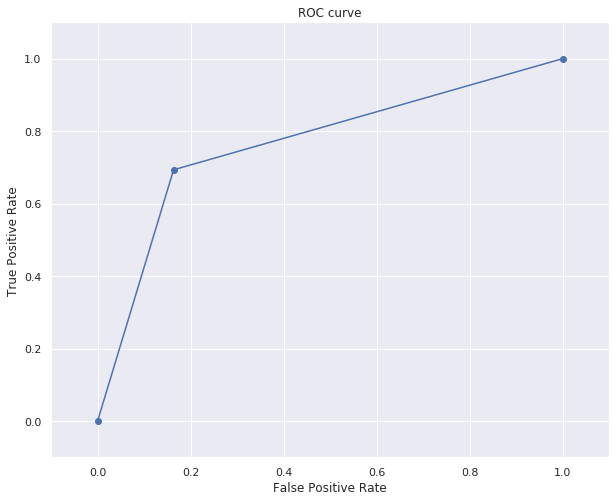

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

We can see that the model is **overfitted**. In fact Accuracy on Training dataset is much more than that on Test dataset

# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

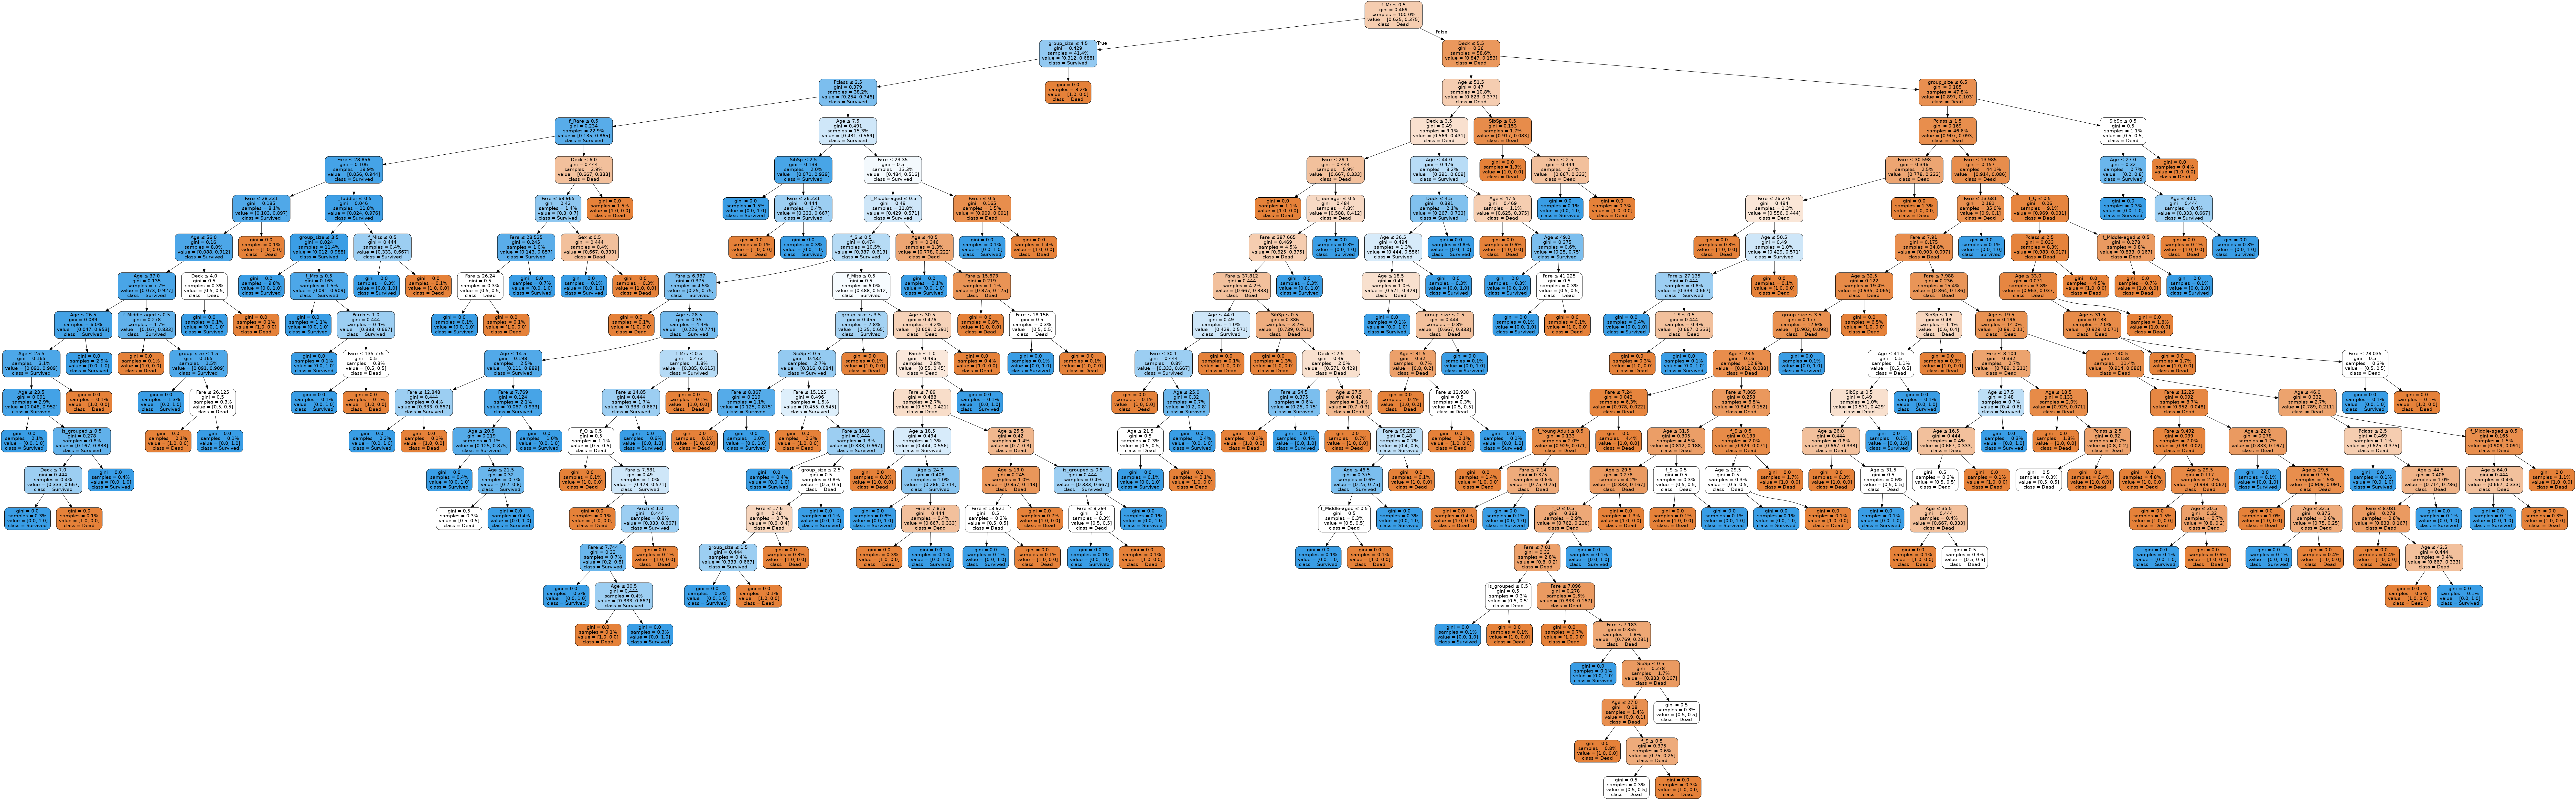

In [27]:
dot_data = StringIO()
tree.export_graphviz(clf_tree, out_file=dot_data, label='all',proportion=True, 
                filled=True, rounded=True, feature_names=X.columns,class_names=["Dead","Survived"],
                special_characters=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


The most important feature which separate Dead from Survived Passenger is that if the passenger is a "**Mr**" one. It mean an adult (young adult or adult generation) male. 

In the rescue operation gentel-mens lets women to get first aboard of the rescue boats.

Also womens in big passengers familly (>=5 peoples) are most probable to die

# 3. Change the decision tree parameters (change at least two parameters)

In [28]:
tree_params = {'max_depth': range(3,15),
               'max_features': range(5,15),
               'max_leaf_nodes': range(5,20),
               'min_samples_leaf': range(5,20)}

tree_grid = GridSearchCV(clf_tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 27000 candidates, totalling 135000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 22032 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 36432 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 54032 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 74832 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 126032 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 135000 out of 135000 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_

In [29]:
tree_grid.best_params_

{'max_depth': 4,
 'max_features': 8,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5}

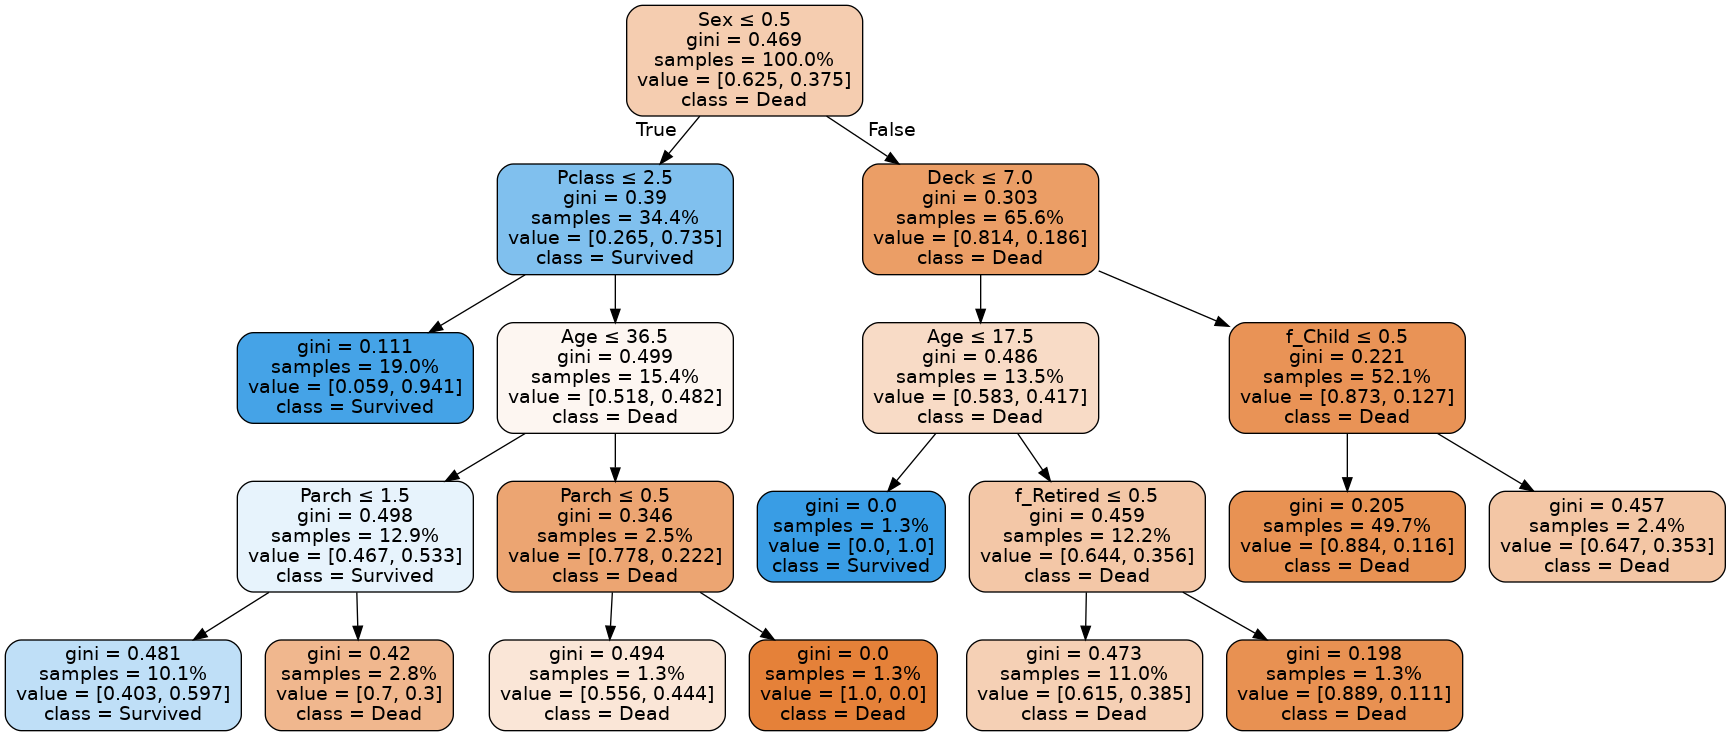

In [30]:
dot_data = StringIO()
tree.export_graphviz(tree_grid.best_estimator_, out_file=dot_data, label='all',proportion=True, 
                filled=True, rounded=True, feature_names=X.columns,class_names=["Dead","Survived"],
                special_characters=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 4. Calculate the new accuracy and compare it with the previous results. 

In [31]:
print(f'Mean Training Accuracy Score: {tree_grid.best_score_:.3f}')
print(f'Test Training Accuracy Score: {tree_grid.best_estimator_.score(x_test,y_test):.3f}')

Mean Training Accuracy Score: 0.829
Test Training Accuracy Score: 0.788


Despite the new model Training accuracy is less than the first one, it's **not overfitted** . In fact Trainning and test accuracy are close to each other 

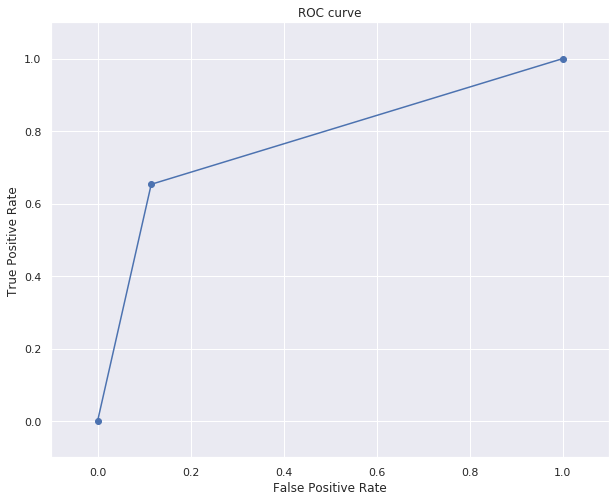

In [32]:
y_hat2=tree_grid.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat2)
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [33]:
print("Performance of the Decision Tree classifier = {:.3f}".format(metrics.roc_auc_score(y_test, y_hat2)))

Performance of the Decision Tree classifier = 0.769


# 5. Use random forest then change the number of estimators

In [34]:
clf=RandomForestClassifier(n_estimators=50, **tree_grid.best_params_)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=8,
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 6. Calculate the new accuracy and compare it with the previous result.

In [35]:
print(f'Mean Training Accuracy Score: {clf.score(x_train,y_train):.3f}')
print(f'Test Training Accuracy Score: {clf.score(x_test,y_test):.3f}')

Mean Training Accuracy Score: 0.833
Test Training Accuracy Score: 0.827


The Accuracy of the random forest classifier is **better** than the tunned Decision Tree classifier found using grid search

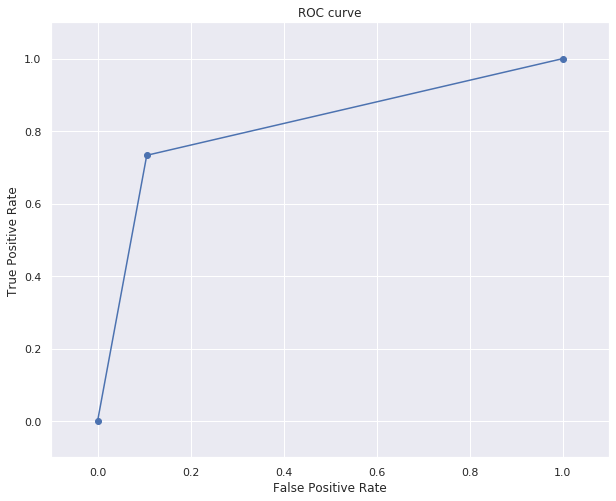

In [36]:
y_hat3=clf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_hat3)
plt.plot(fpr, tpr, '-o')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [37]:
print("Performance of the Random Forest classifier = {:.3f}".format(metrics.roc_auc_score(y_test, y_hat3)))

Performance of the Random Forest classifier = 0.814
